# Selecionar a melhor estratégia para classificação com Random Forest

Neste notebook exploraremos os métodos para conseguir a melhor configuração da quantidade de árvores do algoritmo _Random Forest_ e a melhor estratégia pra eliminação dos _mising values_.
 
Variamos os valores _e_ (quantidade de etimadores) entre valores ímpares e utilizamos a acurácia como métrica para selecionar a melhor estratégia.

### importar as bibliotecas necessárias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

### Carregar as bases de dados

In [2]:
# Dados de treinameto
# Missing values substituídos pela média, moda e mediana, respectiviamente
training_mean = pd.read_csv("data/training_mean.csv").set_index('sessionNo')
training_mode = pd.read_csv("data/training_mode.csv").set_index('sessionNo')
training_median = pd.read_csv("data/training_median.csv").set_index('sessionNo')

# Dados de teste
# Missing values substituídos pela média, moda e mediana, respectiviamente
testing_mean = pd.read_csv("data/testing_mean.csv").set_index('sessionNo')
testing_mode = pd.read_csv("data/testing_mode.csv").set_index('sessionNo')
testing_median = pd.read_csv("data/testing_median.csv").set_index('sessionNo')

## Funções auxiliares

### Separar um dataframe em um vetor de características e  um vetor de classe

In [3]:
def splitData(df):
    x = df.iloc[:, :-1]
    y = df['order']
    return x, y

### Calcular um vetor de acurácias para cada valor de e

Dado um vetor de valores de teste, treina um estimador e calcula a acurácia, retorna um vetor de acurácias, a maior acurácia e o valor _e_ que resultou nessa acurácia.

In [4]:
def makeAccsRf(df_train, df_test, test_values):
    x_train, y_train = splitData(df_train)
    x_test, y_test = splitData(df_test)
    accs = []
    best_e = 1
    maxi = 0.
    for e in test_values:
        rf = RandomForestClassifier(n_estimators=e, criterion="entropy", random_state=0, n_jobs=-1)
        rf.fit(x_train, y_train)
        acc = rf.score(x_test, y_test)
        if(acc > maxi):
            maxi = acc
            best_e = e
        accs.append(acc)
    return accs, maxi, best_e

### Apresenta um gráfico com os valores de _e_ e a acurácia obitida pelo modelo

Importante ressaltar que os valores testados devem ser ímpares

In [5]:
def plotAcc(df_train, df_test, test_values):
    accs, maxi, best_e = makeAccsRf(df_train, df_test, test_values)
    plt.plot(test_values, accs)
    plt.xlabel('Quantidade de Estimadores')
    plt.ylabel('Acurácia')
    plt.title('Acurácias por Quantidade de Estimadores')
    plt.show()
    print('Maior acurácia: '+ str(maxi))
    print('Melhor e: '+ str(best_e))

## Execuçao dos experimentos

### Missing values substituídos pela média

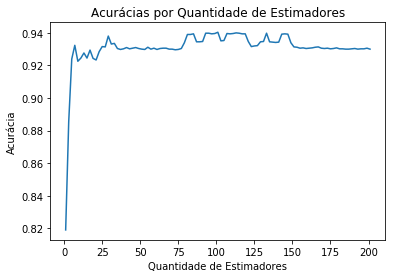

Maior acurácia: 0.940324789669
Melhor e: 101


In [6]:
# Testar os valores ímpares entre 0 e 203
plotAcc(training_mean, testing_mean, list(range(1, 203, 2)))

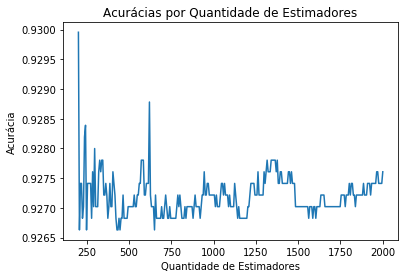

Maior acurácia: 0.929954999022
Melhor e: 201


In [7]:
# Testar os valores ímpares entre 201 e 2003 de 6 em 6
plotAcc(training_mean, testing_mean, list(range(201, 2003, 6)))

### Missing values substituídos pela moda

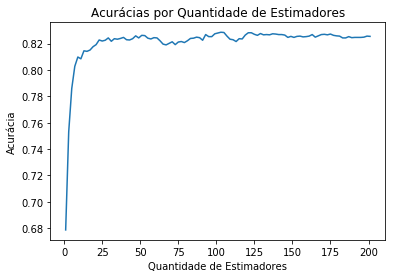

Maior acurácia: 0.828604969673
Melhor e: 103


In [8]:
# Testar os valores ímpares entre 0 e 203
plotAcc(training_mode, testing_mode, list(range(1, 203, 2)))

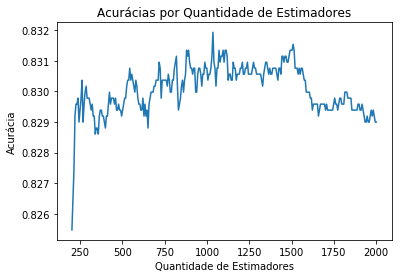

Maior acurácia: 0.831931128938
Melhor e: 1035


In [9]:
# Testar os valores ímpares entre 201 e 2003 de 6 em 6
plotAcc(training_mode, testing_mode, list(range(201, 2003, 6)))

### Missing values substituídos pela mediana

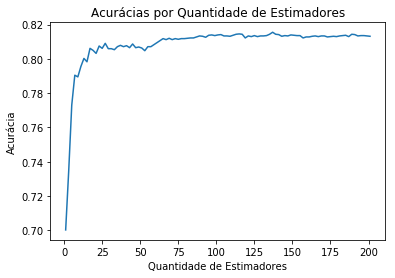

Maior acurácia: 0.815495989043
Melhor e: 137


In [11]:
# Testar os valores ímpares entre 0 e 203
plotAcc(training_median, testing_median, list(range(1, 203, 2)))

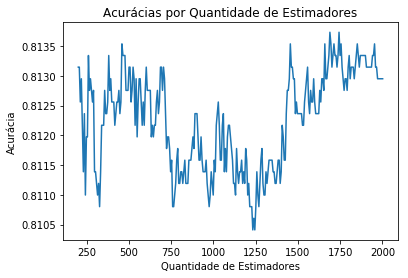

Maior acurácia: 0.813735081197
Melhor e: 1689


In [12]:
# Testar os valores ímpares entre 201 e 2003 de 6 em 6
plotAcc(training_median, testing_median, list(range(201, 2003, 6)))

## Conclusão

Baseado nos valores máximos de acurácia, decidimos que a estrátégia de substituir os _missing values_ pela média e _e_ = 101 será utilizada na etapa de seleção de variáveis.